## Observations and Insights

## Dependencies and starter code

In [86]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [87]:

# Combine the data into a single dataset

In [88]:
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [89]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [91]:
# create a subset for grouping by

In [92]:
tumor_volume=df[["Drug Regimen","Tumor Volume (mm3)"]]

In [93]:
#getting Describe() statistics

In [94]:
tumor_volume_stat=tumor_volume.groupby("Drug Regimen").describe()

In [95]:
#getting Standard Error (SEM) stats

In [96]:
tumor_volume_sem=tumor_volume.groupby("Drug Regimen").sem()

In [97]:
tumor_volume_stat

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [98]:
#Renaming column in SEM df

In [99]:
tumor_volume_sem=tumor_volume_sem.rename({"Tumor Volume (mm3)":"SEM"},axis=1)

In [100]:
tumor_volume_sem

,SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [101]:
#merging Describe and SEM dfs

In [102]:
tumor_volume_final=pd.merge(tumor_volume_stat,tumor_volume_sem,how="left",on=["Drug Regimen"])

In [103]:
#renaming columns in resulting df

In [104]:
tumor_volume_final.columns=['Count','Mean','STD','MIN','25%','Meidan','75%','MAX','SEM']

In [105]:
tumor_volume_final

,Count,Mean,STD,MIN,25%,Meidan,75%,MAX,SEM
Drug Regimen,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


## Bar plots

In [106]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [107]:
tumor_volume_plot=tumor_volume_final[["Count","Mean","Meidan"]]

<IPython.core.display.Javascript object>


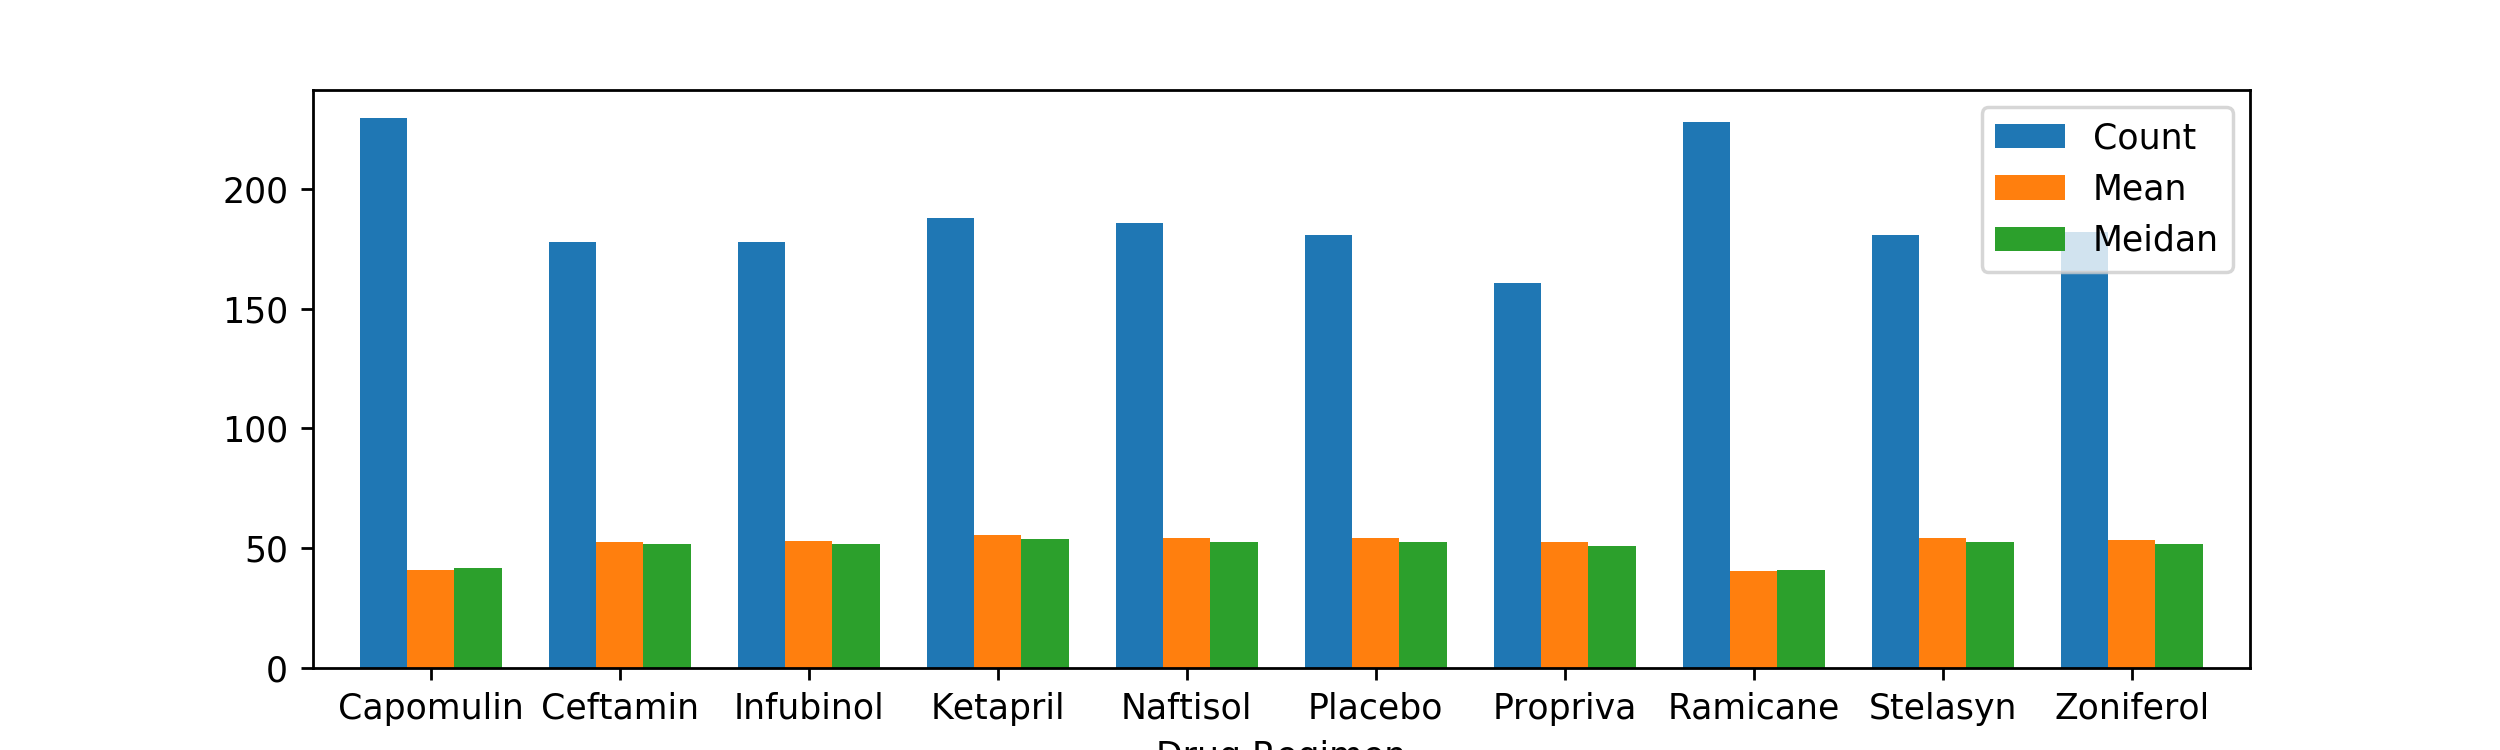

In [108]:
tumor_volume_plot.plot.bar(figsize=(10,3),width=0.75,rot=0)

In [109]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [110]:
tumor_volume_plot=tumor_volume_plot.reset_index()
tumor_volume_plot

,Drug Regimen,Count,Mean,Meidan
0,Capomulin,230.0,40.675741,41.557809
1,Ceftamin,178.0,52.591172,51.776157
2,Infubinol,178.0,52.884795,51.820584
3,Ketapril,188.0,55.235638,53.698743
4,Naftisol,186.0,54.331565,52.509285
5,Placebo,181.0,54.033581,52.288934
6,Propriva,161.0,52.322552,50.854632
7,Ramicane,228.0,40.216745,40.673236
8,Stelasyn,181.0,54.233149,52.431737
9,Zoniferol,182.0,53.236507,51.818479


In [111]:
#plt.xticks(tumor_volume_plot,tumor_volume_plot.index)

In [112]:
# Set x axis and tick locations
x_axis = np.arange(len(tumor_volume_plot))
tick_locations = [value+0.4 for value in x_axis]

<IPython.core.display.Javascript object>


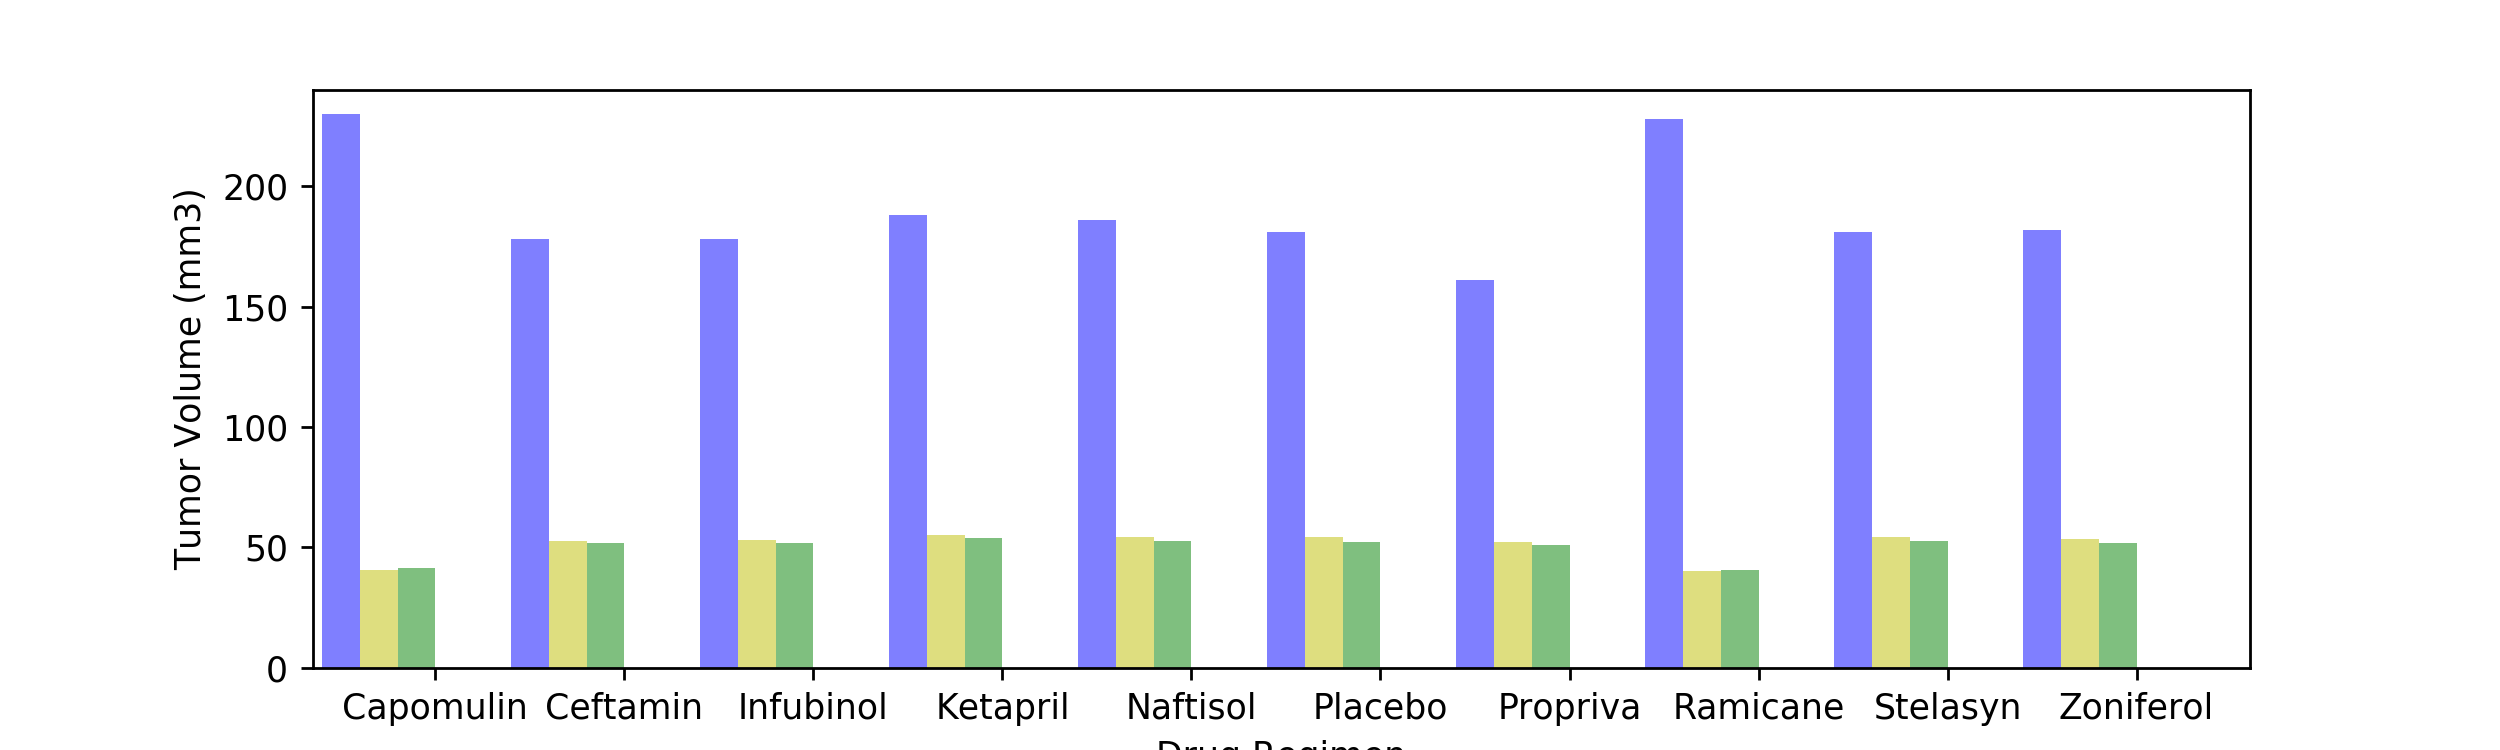

([<matplotlib.axis.XTick at 0x19cea5b5208>,
 <a list of 10 Text xticklabel objects>)

In [113]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,3))
plt.bar(x_axis-0.2, tumor_volume_plot["Count"], color='b',width=0.2, alpha=0.5,align="edge")
plt.bar(x_axis, tumor_volume_plot["Mean"], color='y', width=0.2,alpha=0.5,align="edge")
plt.bar(x_axis+0.2, tumor_volume_plot["Meidan"], color='g',width=0.2, alpha=0.5, align="edge")
plt.xticks(tick_locations, tumor_volume_plot["Drug Regimen"])


In [114]:
 #Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(tumor_volume_plot["Count"])+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Pie plots

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [116]:
#df

In [117]:
#df_pie=df["Sex"]

In [118]:
#sex=df_pie.unique()

In [119]:
#sex_count
#sex_count.plot(kind='pie')
#plt.axis('equal')
#plt.show()

In [120]:
#sex_count=df_pie.value_counts()


In [121]:
#sex_count

In [122]:
#sex_df=pd.DataFrame(sex_count)

In [123]:
#sex_df=sex_df.reset_index()
#sex_df

In [124]:
#sex_plot=sex_df.plot.pie(y='Sex',figsize=(5,5))

In [125]:
sex_drug=df[["Drug Regimen","Sex"]]

In [137]:
sex_drug_male=sex_drug[sex_drug["Sex"]=="Male"]
sex_drug_male

,Drug Regimen,Sex
0,Ramicane,Male
1,Ramicane,Male
2,Ramicane,Male
3,Ramicane,Male
4,Ramicane,Male
...,...,...
1888,Naftisol,Male
1889,Naftisol,Male
1890,Naftisol,Male
1891,Naftisol,Male


In [140]:
sex__groupby_total=sex_drug.groupby("Drug Regimen").count()

In [141]:
sex__groupby_total

,Sex
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [142]:
sex__groupby=sex_drug_filtered.groupby("Drug Regimen").count()

In [129]:
#sex_plot_male=sex__groupby_drug.plot.pie(y='Sex',figsize=(5,5),autopct='%1.1f%%')

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [131]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [132]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [133]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [134]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [135]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen